# To-dos (13/11/23)

1. Remove fits to log, only use fit_short
2. Investigate the bad fits for the slices 
3. Confirm that the mcmc really does work for the entire fit
4. Plot the curve using [a, b, c, d] and play around with these values
5. Fix d = 0.5, and add "error parameters" for the temperature (eT + f) 
6. Run mcmc for this starting from e = 1, f = 0
7. Just use the entire series as your fit function

In [1]:
import emcee as mc #try markov chain monte carlo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import data_analysis_script as da
import importlib as im
from scipy.optimize import curve_fit, minimize
import emcee as mc #try markov chain monte carlo

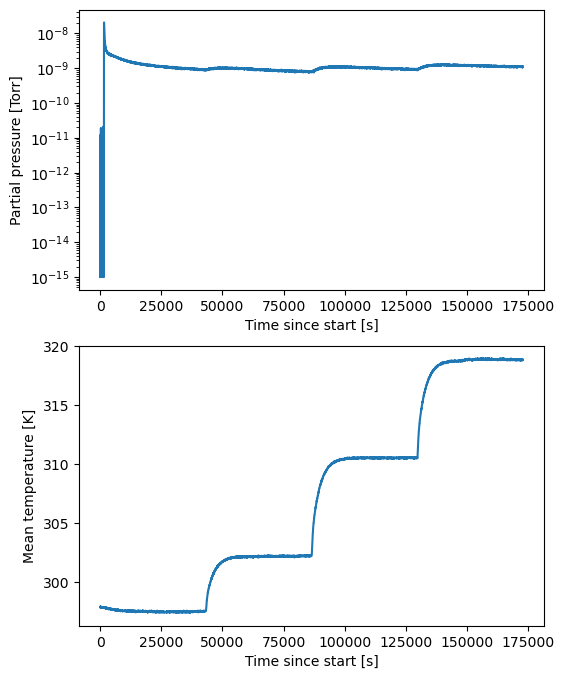

In [3]:
from data_analysis_script import Dataset
run_label = '2023-11-06' ## Change this to look at different runs
d = Dataset(run_label=run_label, gases=['O2'])
d.GetData()
d.PlotSingleGas('O2')

In [4]:
time = np.array(d.data['O2']['Exposure_time'])
temp = np.array(d.data['O2']['Mean_temp']) #['Mean_temp'])
p = np.array(d.data['O2']['Partial_pressure'])

In [5]:
#For Linear only

'''def plot_single_short(x,y, bp, log=False):
    #print('y: ', y)
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    plt.plot(x[0,:],y,'k')
    if(log):
        plt.plot(x[0,:], d.logfitfunction(x, *bp), 'r')
    else:
        plt.plot(x[0,:], d.fitfunction_short_temp_offset(x, *bp), 'r')
    plt.ylabel('Pressure [mbar]')
    plt.xlabel("Time [s]")
    plt.show()


tT = np.vstack((time, temp))

    
spars = [3.03352926e-2, 1.12386982e+06, -3.44588211e+04, 1, 0]
    #res = minimize(combined_chisq, spars, args=(combined_data))
    #print('res:',res)  # Print the result of the optimization.

# Plot the fitted model for each time slice.
#for j in range(len(time_slices)):
    # Plot the data and the fitted model for the current time slice.
   # plot_single(combined_data[j][0], np.log(combined_data[j][1]), [bp[j], bp[-2], bp[-1]], log=True)
    
bp, bc = curve_fit(d.fitfunction_short_temp_offset, tT, p, p0=spars, method='lm', maxfev=90000)
   
print('bp: ',bp)
    #spars = bp
    #bp = spars

plot_single_short(tT, p, bp)'''
    

'def plot_single_short(x,y, bp, log=False):\n    #print(\'y: \', y)\n    plt.figure(figsize=(8,8))\n    plt.subplot(2,1,1)\n    plt.plot(x[0,:],y,\'k\')\n    if(log):\n        plt.plot(x[0,:], d.logfitfunction(x, *bp), \'r\')\n    else:\n        plt.plot(x[0,:], d.fitfunction_short_temp_offset(x, *bp), \'r\')\n    plt.ylabel(\'Pressure [mbar]\')\n    plt.xlabel("Time [s]")\n    plt.show()\n\n\ntT = np.vstack((time, temp))\n\n    \nspars = [3.03352926e-2, 1.12386982e+06, -3.44588211e+04, 1, 0]\n    #res = minimize(combined_chisq, spars, args=(combined_data))\n    #print(\'res:\',res)  # Print the result of the optimization.\n\n# Plot the fitted model for each time slice.\n#for j in range(len(time_slices)):\n    # Plot the data and the fitted model for the current time slice.\n   # plot_single(combined_data[j][0], np.log(combined_data[j][1]), [bp[j], bp[-2], bp[-1]], log=True)\n    \nbp, bc = curve_fit(d.fitfunction_short_temp_offset, tT, p, p0=spars, method=\'lm\', maxfev=90000)\n   \np

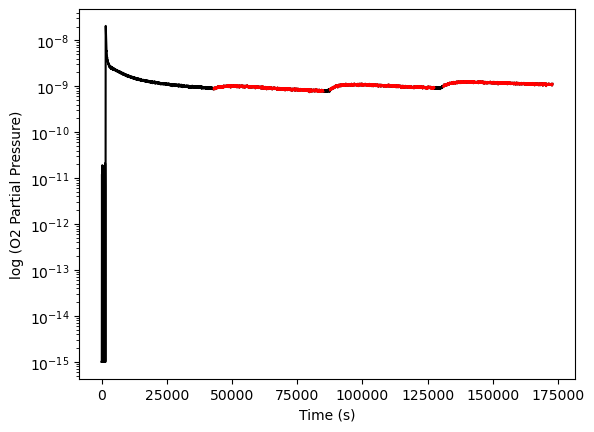

In [6]:
time_slices = [[43000, 85000],
               [87500, 127500],
               [131000, 175000]]

plt.semilogy(time, p, 'k') # Plot the logarithm (base 10) of the partial pressure of O2 (oxygen) against time. 
plt.ylabel('log (O2 Partial Pressure)') 
plt.xlabel('Time (s)')

for ts in time_slices:
    gpts = (time > ts[0]) & (time < ts[1])
    plt.semilogy(time[gpts], p[gpts],'r')
# plt.ylim(2e-9, 3e-8)
#plt.xlim(12e4, 14e4)
plt.show()

# Fit to fitfunction (no log, no short)

[6.47284406e-03 4.71635025e+03 4.67521333e+01]


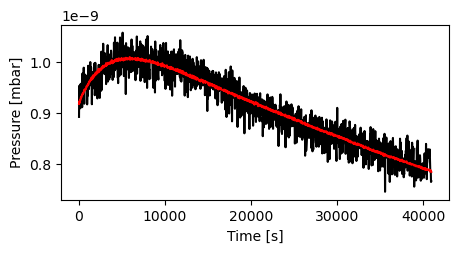

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [7]:
def plot_single(x,y,bp, log=False):
    plt.figure(figsize=(5,5))
    plt.subplot(2,1,1)
    plt.plot(x[0,:],y,'k')
    if(log):
        plt.plot(x[0,:], d.logfitfunction(x, *bp), 'r')
    else:
        plt.plot(x[0,:], d.fitfunction(x, *bp), 'r')
    plt.ylabel('Pressure [mbar]')
    plt.xlabel("Time [s]")

    # to plot the temperature 
#     plt.subplot(2,1,2)
#     plt.plot(x[0,:],x[1,:],'k')
#     plt.ylabel('Temperature [K]')
#     plt.xlabel("Time [s]")
        
    plt.show()

## fit each time individually
im.reload(da)

time_slices = [[44000, 85000],
               [87500, 127500],
               [131000, 175000]]

fit_params = np.zeros((len(time_slices), 3))

for j, ts in enumerate(time_slices):
    gpts = (time > ts[0]) & (time < ts[1])

    tT = np.vstack((time[gpts]-time[gpts][0], temp[gpts]))
    y = p[gpts]
    
    spars = [4.48859880e-04, 3.45969798e+03, 3.98032858e-01]
    bp, bc = curve_fit(d.fitfunction, tT, y, p0=spars)

    print(bp)
    #bp = spars
    fit_params[j,:] = bp

    plot_single(tT, y, bp)

# To visually see how the parameters change from slice to slice   

# plt.figure()
# plt.subplot(3,1,1)
# plt.semilogy([1,2,3], fit_params[:,0], 'ko-')
# plt.ylabel("A")

# plt.subplot(3,1,2)
# plt.semilogy([1,2,3], fit_params[:,1], 'bo-')
# plt.ylabel("B")

# plt.subplot(3,1,3)
# plt.semilogy([1,2,3], fit_params[:,2], 'ro-')
# plt.ylabel("C")
# plt.xlabel("Time period")
# plt.gca().set_xticks([1,2,3])
# plt.subplots_adjust(hspace=0)
print(fit_params)
plt.show()

# fit to log.fitfunction

In [ ]:
# Define the function to calculate the combined chi-squared value by 
# evaluating the goodness of fit for multiple datasets simultaneously
def combined_chisq(params, data_dict):
    # Number of datasets
    ndsets = len(data_dict.keys())

    # Separate the parameters: amplitude for each dataset and common parameters b and c.
    amp_vec = params[:ndsets]  # Amplitude parameters, unique for each dataset.
    b, c = params[-2], params[-1]  # Common parameters for all datasets.

    tot_chisq = 0  # Initialize the total chi-squared value.

    # Iterate over each dataset to calculate its chi-squared value.
    for n in range(ndsets):
        cdat = data_dict[n]  # Current dataset.
        # Calculate the chi-squared value for the current dataset.
        curr_chisq = np.sum((d.logfitfunction(cdat[0], amp_vec[n], b, c) - np.log(cdat[1]))**2)
        # Check for NaN values and handle them by adding infinity to the total chi-squared.
        if not np.isnan(curr_chisq):
            tot_chisq += curr_chisq
        else:
            tot_chisq += np.inf

    return tot_chisq  # Return the total chi-squared value.

# Define time slices for the analysis.
time_slices = [#[43000, 85000],
               [87500, 127500],
               [131000, 175000]]

# Dictionary to store data for each time slice.
combined_data = {}

# Prepare the data for each time slice and store in the dictionary.
for j, ts in enumerate(time_slices):
    # Get the data points within the current time slice.
    gpts = (time > ts[0]) & (time < ts[1])
    # Stack the time and temperature data for the current time slice.
    tT = np.vstack((time[gpts]-time[gpts][0], temp[gpts]))
    # Get the corresponding pressure data.
    y = p[gpts]
    # Store the data in the dictionary.
    combined_data[j] = [tT, y]

# Initial parameters for the optimization.
spars = [-7.74881756e+00, -8.04881756e+00, 3.44741784e+03, 3.82129198e-01]

# Perform the optimization to minimize the combined chi-squared value.
res = minimize(combined_chisq, spars, args=(combined_data))

# Extract the best-fit parameters.
bp = res.x
print(res)  # Print the result of the optimization.

# Plot the fitted model for each time slice.
for j in range(len(time_slices)):
    # Plot the data and the fitted model for the current time slice.
    plot_single(combined_data[j][0], np.log(combined_data[j][1]), [bp[j], bp[-2], bp[-1]], log=True)

# MCMC

In [ ]:
## try MCMC
import emcee as mc

In [ ]:
ndim = 5
nwalkers = 10
nsteps = 100
initial_parameters = np.array([5e-4, 4.48859880e-01, 3.98032858e+03, 1, 0.1])
pos = [initial_parameters * (1 + 0.01*np.random.randn(ndim)) for _ in range(nwalkers)]
sampler = mc.EnsembleSampler(nwalkers, ndim, combined_chisq, args=(combined_data,))
sampler.run_mcmc(pos, nsteps, progress=True)
'''samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
optimized_params = np.median(samples, axis=0)
print(optimized_params)'''

samples = sampler.chain

# Flatten the chain so that we have a list of samples for each walker
flattened_samples = sampler.chain.reshape((-1, ndim))

# Print the converged values (e.g., medians of the distributions)
converged_values = np.median(flattened_samples, axis=0)
print('Converged values:', converged_values)

fig, axes = plt.subplots(5, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["a", "b", "c", "e", "f"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");


In [ ]:
spars = np.array([3.03352926e-10, 1.12386982e+06, -3.44588211e+04, 1])
pos = spars * (1 + 0.1*np.random.randn(8, 4))
nwalkers, ndim = pos.shape

sampler = mc.EnsembleSampler(nwalkers, ndim, combined_chisq, args=(combined_data,))
sampler.run_mcmc(pos, 500, progress=True)

In [ ]:
print(pos.shape)

NameError: name 'sampler' is not defined

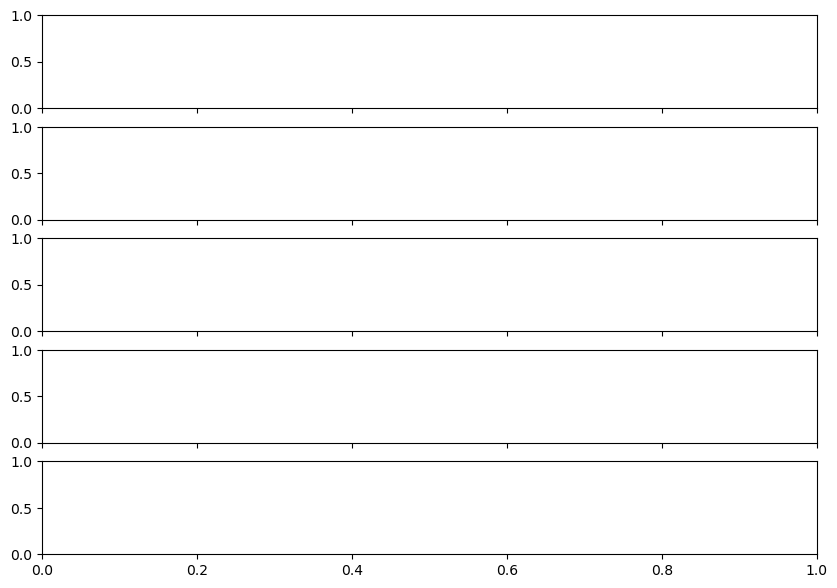

In [8]:
fig, axes = plt.subplots(5, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["a", "b", "c", "e", "f"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
## now try in the short time limit

def plot_single_short(x,y, bp, log=False):
    #print('y: ', y)
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    plt.plot(x[0,:],y,'k')
    if(log):
        plt.plot(x[0,:], d.logfitfunction(x, *bp), 'r')
    else:
        plt.plot(x[0,:], d.fitfunction_short_temp_offset(x, *bp), 'r')
    plt.ylabel('Pressure [mbar]')
    plt.xlabel("Time [s]")
    plt.show()
    
def combined_chisq_short(params, data_dict):
    
    ndsets = len(data_dict.keys())
 
    a, b, c, e, f = params[0], params[1], params[2], params[3], params[4]
    

    tot_chisq = 0
    sig = 0.5e-9 ## error on values

    for n in range(ndsets):
        cdat = data_dict[n]
        curr_chisq = np.sum(((d.fitfunction_short_temp_offset(cdat[0], a, b, c, e, f) - cdat[1])/sig)**2)
        if(not np.isnan(curr_chisq)):
            tot_chisq += curr_chisq
        else:
            tot_chisq += np.inf

    return tot_chisq

In [9]:
## fit each time individually
im.reload(da)
time_slices = [[44000, 85000],
               [87500, 127500],
               [131000, 175000]]

fit_params = np.zeros((len(time_slices), 5))

for j, ts in enumerate(time_slices):
    gpts = (time > ts[0]) & (time < ts[1])

    tT = np.vstack((time[gpts], temp[gpts]))
    y = p[gpts]
    
    spars = [3.03352926e-8, 1.12386982e+06, -3.44588211e+04, 1, 0]
    #res = minimize(combined_chisq, spars, args=(combined_data))
    #print('res:',res)  # Print the result of the optimization.

# Plot the fitted model for each time slice.
#for j in range(len(time_slices)):
    # Plot the data and the fitted model for the current time slice.
   # plot_single(combined_data[j][0], np.log(combined_data[j][1]), [bp[j], bp[-2], bp[-1]], log=True)
    
    bp, bc = curve_fit(d.fitfunction_short_temp_offset, tT, y, p0=spars, method='lm', maxfev=90000)
   
    print('bp: ',bp)
    #spars = bp
    #bp = spars

    plot_single_short(tT, y, bp)
    
    

(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)
(2, 1341)


NameError: name 'plot_single_short' is not defined

In [31]:
def combined_chisq_short(params, data_list):
    ds = Dataset("","")
    ndsets = len(data_list)

    a, b, c, e, f = params[0], params[1], params[2], params[3], params[4]


    tot_chisq = 0
    sig = 0.5e-9 ## error on values
    e_err = 0.2
    f_err = 1

    for n in range(ndsets):
        cdat = data_list[n]
        curr_chisq = np.sum(((d.fitfunction_short_temp_offset(cdat, a, b, c, e, f) - cdat[1])/sig)**2) + ((e - 1)/(2*e_err))**2 + ((f - 0)/(2*f_err))**2
        if(not np.isnan(curr_chisq)):
            tot_chisq += curr_chisq
        else:
            tot_chisq += np.inf

    return tot_chisq

(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
bp: [ 3.03352926e-10  1.12386982e+06 -3.44588211e+04  1.00000000e+00
  0.00000000e+00]
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1309)
bp: [ 3.03352926e-10  1.12386982e+06 -3.44588211e+04  1.00000000e+00
  0.00000000e+00]
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1368)
bp: [ 3.03352926e-10  1.12386982e+06 -3.44588211e+04  1.00000000e+00
  0.00000000e+00]
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)
(2, 1368)
(2, 1373)
(2, 1309)

Text(0.5, 0, 'Time [s]')

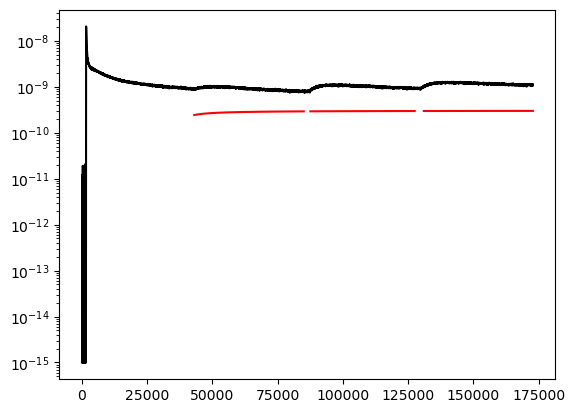

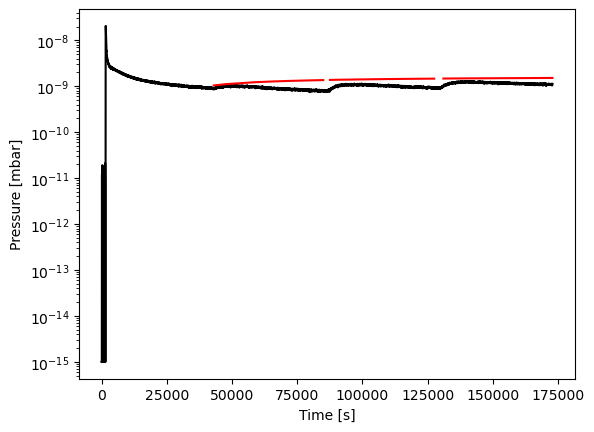

In [58]:
## now try to fit all together

time_slices = [[43000, 85000],
               [87500, 127500],
               [131000, 175000]]

plt.figure()
plt.semilogy(time, p, 'k')

for j,ts in enumerate(time_slices):
    gpts = (time > ts[0]) & (time < ts[1])
    tT = np.vstack((time[gpts], temp[gpts]))
    y = p[gpts]
    spars = [3.03352926e-10, 1.12386982e+06, -3.44588211e+04, 1, 0]
    #res = minimize(combined_chisq_short, spars, args=(combined_data,))
    #bp = res.x
    bp, bc = curve_fit(d.fitfunction_short_temp_offset, tT, y, p0=spars, method='lm', maxfev=90000)
    plt.plot(tT[0], d.fitfunction_short_temp_offset(tT,*bp),'r')
    print('bp:', bp)
    #res = minimize(combined_chisq_short, spars, args=(combined_data,))
    #bp = res.x


tT = []
y = []
combined_data = []
plt.figure()
plt.semilogy(time, p, 'k')
for j,ts in enumerate(time_slices):
    gpts = (time > ts[0]) & (time < ts[1])
    tT.append((np.vstack((time[gpts], temp[gpts]))))
    y.append(p[gpts])
    combined_data.append([time[gpts], p[gpts]])
spars = [3.48859880e-09, 3.45969798e+03, 3.98032858e-01, 1, 0]
#bp, bc = curve_fit(d.fitfunction_short_temp_offset, np.vstack((time,temp)), p, p0=spars, method='lm', maxfev=90000)
res = minimize(combined_chisq_short, spars, args=(combined_data))
bp = res.x

for j in range(len(time_slices)):
    tvals = combined_data[j][0]
    plt.plot(tvals, d.fitfunction_short_temp_offset(tT[j], 1.64464823e-09, 8.13447708e+06, -1.30435327e+04, 1, 0), 'r')

plt.ylabel('Pressure [mbar]')
plt.xlabel("Time [s]")


In [ ]:
print(len(combined_data[2][0]))
print(combined_data[0][0])

In [ ]:
print(tT[0])

In [ ]:
print(tvals.shape)

In [ ]:
print(tT.shape)

In [ ]:
print(len(time_slices))

In [ ]:
print(ts)

In [ ]:
tvec = np.logspace(-6,0,1000)

maxn = 200

fval = np.zeros_like(tvec)
for n in range(maxn):
    fval += np.exp(-(np.pi*(2*n+1))**2*tvec)

plt.figure()
plt.loglog(tvec, fval)

In [ ]:
pos = bp[4] * (1 + 1e-3*np.random.randn(16, len(spars)))
nwalkers, ndim = pos.shape

ffn = lambda p,d: -combined_chisq_short(p,d)

sampler = mc.EnsembleSampler(nwalkers, ndim, ffn, args=(combined_data,))
sampler.run_mcmc(pos, 5000, progress=True)

In [ ]:
fig, axes = plt.subplots(5, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["a", "b", "c", "e","f"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [ ]:
import corner

flat_samples = sampler.get_chain(discard=1000, thin=15, flat=True)
print(flat_samples.shape)

fig = corner.corner(flat_samples, labels=labels)

In [ ]:
plt.figure()
plt.semilogy(time, p, 'k')

inds = np.random.randint(len(flat_samples), size=10)
for ind in inds:
    sample = flat_samples[ind]
    for j in range(len(time_slices)):
        tvals = combined_data[j][0][0]
        plt.plot(tvals, d.fitfunction_short_temp_offset(combined_data[j][0], sample[0], sample[1], sample[2], sample[3], sample[4]), 'r', alpha=0.5)

# plt.ylim(4.5e-9, 6e-9)
plt.ylabel('Pressure [mbar]')
plt.xlabel("Time [s]")

In [ ]:
from IPython.display import display, Math

CI = 10 ## L/s
Area = 0.01 ## m^2
mbar_to_Pa = 100
K = 0.22
p_atm = 1.01e5 #Pa
m_to_cm = 100
L_to_m3 = 1e-3

mcmc_D0 = np.percentile((flat_samples[:, 0]*CI*mbar_to_Pa*L_to_m3/(K*p_atm*Area) * m_to_cm)**2, [16, 50, 84])
mcmc_Ea = np.percentile(flat_samples[:, 1], [16, 50, 84])

print("D0 [cm^2/s]: ", mcmc_D0)
print("Activation energy [K]: ", mcmc_Ea)